In [1]:
import csv as csv 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read Jobs Data 
Jobs_Data= pd.read_csv("Jobs_in_data.csv")
print(Jobs_Data)

      work_year                 job_title                    job_category  \
0          2023      Data DevOps Engineer                Data Engineering   
1          2023            Data Architect  Data Architecture and Modeling   
2          2023            Data Architect  Data Architecture and Modeling   
3          2023            Data Scientist       Data Science and Research   
4          2023            Data Scientist       Data Science and Research   
...         ...                       ...                             ...   
9350       2021           Data Specialist    Data Management and Strategy   
9351       2020            Data Scientist       Data Science and Research   
9352       2021  Principal Data Scientist       Data Science and Research   
9353       2020            Data Scientist       Data Science and Research   
9354       2020     Business Data Analyst                   Data Analysis   

     salary_currency  salary  salary_in_usd employee_residence  \
0        

## Data Cleaning

In [3]:
# Filter year to only 2023
FJ_Data = Jobs_Data[Jobs_Data['work_year'] == 2023]

# Check last 5 rows as verification
print(FJ_Data.tail())

      work_year                  job_title               job_category  \
7492       2023  Machine Learning Engineer    Machine Learning and AI   
7493       2023             Data Scientist  Data Science and Research   
7494       2023             Data Scientist  Data Science and Research   
7495       2023              Data Engineer           Data Engineering   
7496       2023              Data Engineer           Data Engineering   

     salary_currency  salary  salary_in_usd employee_residence  \
7492             USD  134500         134500      United States   
7493             USD  130000         130000      United States   
7494             USD   90000          90000      United States   
7495             USD  160000         160000      United States   
7496             USD  135000         135000      United States   

     experience_level employment_type work_setting company_location  \
7492           Senior       Full-time    In-person    United States   
7493        Mid-level 

In [4]:
# Filter employee residence to only US
ER_Data= FJ_Data[FJ_Data['employee_residence'] == 'United States']

# Check first 5 rows as verification
print(ER_Data.head())

   work_year       job_title                    job_category salary_currency  \
1       2023  Data Architect  Data Architecture and Modeling             USD   
2       2023  Data Architect  Data Architecture and Modeling             USD   
3       2023  Data Scientist       Data Science and Research             USD   
4       2023  Data Scientist       Data Science and Research             USD   
5       2023  Data Scientist       Data Science and Research             USD   

   salary  salary_in_usd employee_residence experience_level employment_type  \
1  186000         186000      United States           Senior       Full-time   
2   81800          81800      United States           Senior       Full-time   
3  212000         212000      United States           Senior       Full-time   
4   93300          93300      United States           Senior       Full-time   
5  130000         130000      United States           Senior       Full-time   

  work_setting company_location compan

In [5]:
# Rename necessary columns
ER_Data=ER_Data.rename(columns={'employee_residence': 'Country'})
print(ER_Data.head())

   work_year       job_title                    job_category salary_currency  \
1       2023  Data Architect  Data Architecture and Modeling             USD   
2       2023  Data Architect  Data Architecture and Modeling             USD   
3       2023  Data Scientist       Data Science and Research             USD   
4       2023  Data Scientist       Data Science and Research             USD   
5       2023  Data Scientist       Data Science and Research             USD   

   salary  salary_in_usd        Country experience_level employment_type  \
1  186000         186000  United States           Senior       Full-time   
2   81800          81800  United States           Senior       Full-time   
3  212000         212000  United States           Senior       Full-time   
4   93300          93300  United States           Senior       Full-time   
5  130000         130000  United States           Senior       Full-time   

  work_setting company_location company_size  
1    In-person 

In [6]:
# Drop salary_in_usd since it is repetitive
ER_Data= ER_Data.drop(columns={'salary_in_usd'})
print(ER_Data.head())

   work_year       job_title                    job_category salary_currency  \
1       2023  Data Architect  Data Architecture and Modeling             USD   
2       2023  Data Architect  Data Architecture and Modeling             USD   
3       2023  Data Scientist       Data Science and Research             USD   
4       2023  Data Scientist       Data Science and Research             USD   
5       2023  Data Scientist       Data Science and Research             USD   

   salary        Country experience_level employment_type work_setting  \
1  186000  United States           Senior       Full-time    In-person   
2   81800  United States           Senior       Full-time    In-person   
3  212000  United States           Senior       Full-time    In-person   
4   93300  United States           Senior       Full-time    In-person   
5  130000  United States           Senior       Full-time       Remote   

  company_location company_size  
1    United States            M  
2    U

In [7]:
# Drop salary_currency and company_location since it is repetitive
ER_Data = ER_Data.drop(columns={'salary_currency', 'company_location'})
print(ER_Data.head())

   work_year       job_title                    job_category  salary  \
1       2023  Data Architect  Data Architecture and Modeling  186000   
2       2023  Data Architect  Data Architecture and Modeling   81800   
3       2023  Data Scientist       Data Science and Research  212000   
4       2023  Data Scientist       Data Science and Research   93300   
5       2023  Data Scientist       Data Science and Research  130000   

         Country experience_level employment_type work_setting company_size  
1  United States           Senior       Full-time    In-person            M  
2  United States           Senior       Full-time    In-person            M  
3  United States           Senior       Full-time    In-person            M  
4  United States           Senior       Full-time    In-person            M  
5  United States           Senior       Full-time       Remote            M  


### **Question**: What is the avg salary based on experience level?


In [16]:
# (MM)

# grouping by experience level
exp_lvl = ER_Data.groupby('experience_level')

# finding the average salary for each experience level
avg_sal = exp_lvl['salary'].mean()

# display average salaries
print("Average Salary for each Experience Level\n",avg_sal)

Average Salary for each Experience Level
 experience_level
Entry-level    105290.338776
Executive      192222.156863
Mid-level      131201.846085
Senior         168754.329718
Name: salary, dtype: float64


### **Question**: Find the Max/Min salary for each experience level.

In [17]:
# (MM)

# finding the max salary 
max_sal = exp_lvl['salary'].max()

# finding the min salary
min_sal = exp_lvl['salary'].min()

# display the max and min salaries
print("Maximum Salary for each Experience Level\n",max_sal)
print("===================")
print("Minimum Salary for each Experience Level\n",min_sal)

Maximum Salary for each Experience Level
 experience_level
Entry-level    281700
Executive      375500
Mid-level      405000
Senior         392000
Name: salary, dtype: int64
Minimum Salary for each Experience Level
 experience_level
Entry-level    24000
Executive      55000
Mid-level      25500
Senior         38000
Name: salary, dtype: int64


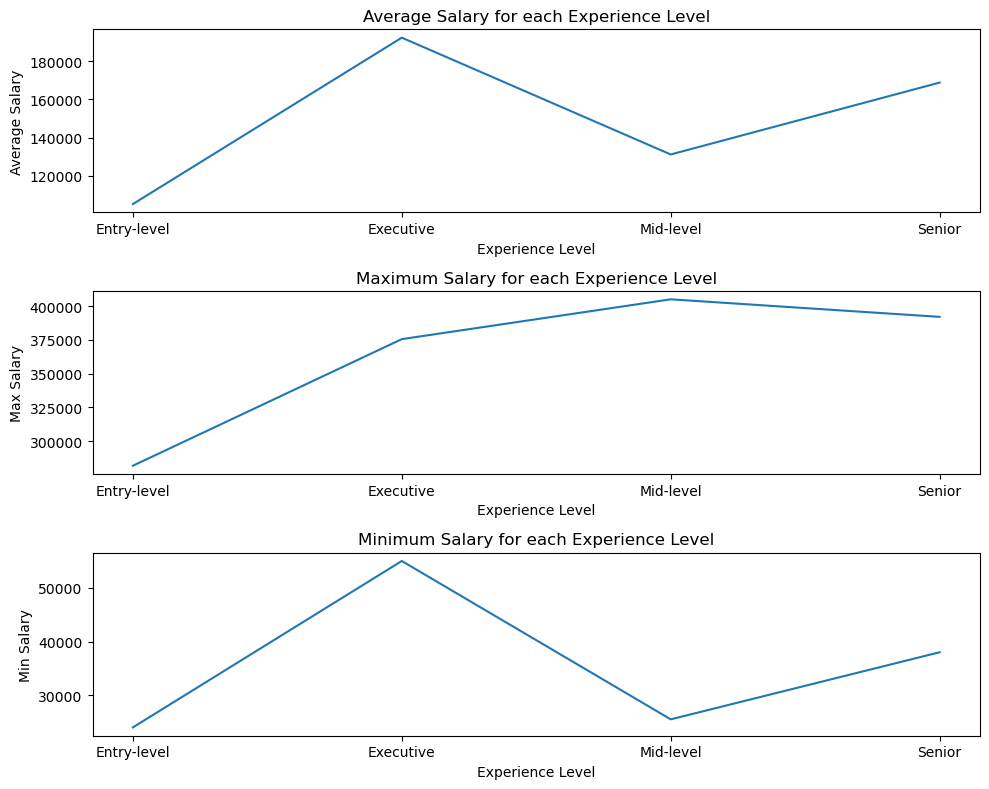

In [35]:
# Visualization: Line Graphs
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(10,8))

# First Plot: Average Salaries
ax1.plot(avg_sal)

# Label Plot
ax1.set_title("Average Salary for each Experience Level")
ax1.set_xlabel("Experience Level")
ax1.set_ylabel("Average Salary")

# Second Plot: Max Salary
ax2.plot(max_sal)

# Label Plot
ax2.set_title("Maximum Salary for each Experience Level")
ax2.set_xlabel("Experience Level")
ax2.set_ylabel("Max Salary")

# Third Plot: Min Salary
ax3.plot(min_sal)

# Label Plot
ax3.set_title("Minimum Salary for each Experience Level")
ax3.set_xlabel("Experience Level")
ax3.set_ylabel("Min Salary")

fig.tight_layout()
plt.show()